In [39]:
import scipy as sps
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import multiprocessing as mp
palette = sns.color_palette("Paired")
size = 8
nsample = 30000

Let $X=(x_1, x_2,...,x_n)$ be a sample of $n$ observations a random variable following PDF $f(x; \lambda)$, in which $\lambda$ is an unknown parameter. The sample is assumed to be iid. The probability of observing such a sample is given by 

$$dP = \prod_{i=1}^n f(x_i; \lambda)dx_i = L(x_1,..., x_n;\lambda)\prod_{i=1}^n dx_i =L_X(\lambda)dX$$

Example: a Poisson variable is sampled $n$ times. The PDF contains the expected number of observations as the unknown parameter, given by 

$$f(x, \lambda) = \frac{ \lambda^x e^{-\lambda}}{x!}$$

The likelihood function is thus given by $$L(\lambda) = \prod_{i=1}^n \frac{ \lambda^{x_i} e^{-\lambda}}{x_i!} $$
It is usually more convenient to use the log likelihood function 
$$l = \log L = \sum_{i=1}^n \log( f(x_i, \lambda) ) $$

In [29]:
# simulate a poissonian dataset 

# mean signal
S = 5
# signal strength parameter
mu = 1

x = sps.stats.poisson.rvs(mu * S, size=nsample)

In [34]:
# log likehood function 

def loglikelihood_poisson(mu, x, S=S):
    return np.sum(sps.stats.poisson.logpmf(x, mu * S))

loglikelihood_poisson(1, x=x)

-66286.63043158583

In [38]:
# maximum likelihood estimation 

# analytic solution to the maximum likelihood estimation is the sample mean divided by the expected signal

def mle_poisson(x, S=S):
    return np.mean(x) / S

mle_poisson(x)

1.0011066666666666

In [37]:
# numerical solution 

def num_mle_poisson(x, S=S):
    return sps.optimize.minimize(lambda mu: -loglikelihood_poisson(mu, x, S), 1, options={'disp': False}).x[0]

num_mle_poisson(x)

1.0011066627514666

In [59]:
# expected value and variance of the maximum likelihood estimator

n_simulations = 1000000
n_process = 20

def simulate_and_estimate_poisson(mu, S=S, nsample=nsample):
    x = sps.stats.poisson.rvs(mu * S, size=nsample)
    return mle_poisson(x, S)

with mp.Pool(n_process) as pool:
    
    results = pool.map(simulate_and_estimate_poisson, [mu] * n_simulations)

results = np.array(results)
results

array([0.99856667, 1.00078   , 0.9993    , ..., 1.00339333, 1.00046667,
       0.99681333])

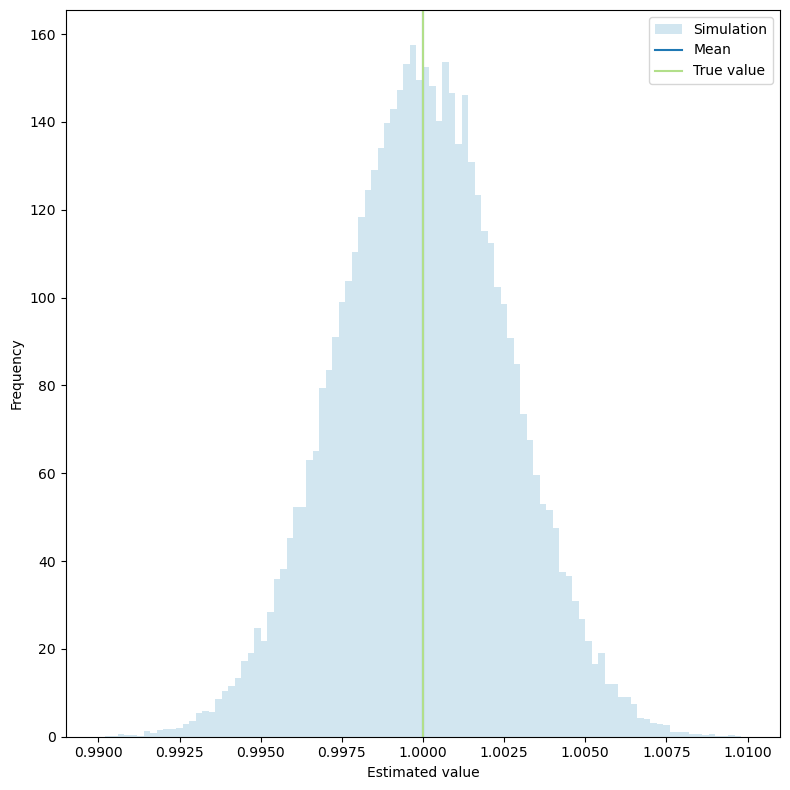

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(size, size))

margin = 0.01

ax.hist(results, bins=100, range=(1-margin,1+margin), color=palette[0], density=True, alpha=0.5, label='Simulation')
ax.axvline(np.mean(results), color=palette[1], label='Mean')


ax.axvline(1, color=palette[2], label='True value')


ax.set_xlabel('Estimated value')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()